# Comparing classification algorithms on the same dataset

In this notebook we're gonna compare different classification algorithms on a breast cancer dataset.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px


In [2]:
df = pd.read_csv('./breast_cancer.csv')

### Exploratory Data Analysis and preprocessing

Let's see what kind of data do we have, and how statistics of the different values.

In [3]:
df = pd.read_csv('./breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


The first thing we notice at first sight is that we have an extra column that seems completely full of NaNs. Let's check it and drop the column if it's the case. As we have 569 NaNs, and 569 rows, we can directly drop it. We don't need the `id` column either

In [5]:
df.iloc[:,32].isna().sum()

569

In [6]:
df = df.drop(df.columns[[0,32]], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We have to also tranform the category labels in numerical values. As booleans work like that, let's remap 'B' to False (not having cancer) and 'M' to True

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df['diagnosis'] = df['diagnosis'] == 'M'
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,True,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,True,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,True,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,True,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Just to ilustrate a bit the data, let's plot a matrix of how the variables are correlated, and also some basic plots.

In [9]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [10]:
px.imshow(df.corr(), title="Correlation heatmap")

As we're interested basically in the diagnosis, let's see the correlation of all values with the target.

In [11]:
diag_corr = df.drop('diagnosis', axis=1).apply(lambda x: x.corr(df.diagnosis))
diag_corr


radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0

### Logistic Regression
First, we have to split the data in test and train sets. To decide the split ratio, we will use the following formula following the article on https://onlinelibrary.wiley.com/doi/full/10.1002/sam.11583

<div style='text-align: center;'>

$y= \frac{1}{\sqrt{p} + 1}$

</div>

where `y` is the split ratio and `p` is the number of parameters (columns) of the dataset. 

Then, we have to separate the label of the data (the diagnosis) and use `train_test_split` method to split the data.

In [12]:
from sklearn.model_selection import train_test_split

split_ratio = 1/((len(df.columns)-1)**0.5 +1)

data = df.drop('diagnosis', axis=1)
target = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=split_ratio)
print(f'Dataset shape: {df.shape}, Train shape: {X_train.shape}, Test shape: {X_test.shape}, Split ratio: {split_ratio:0.2f}')

Dataset shape: (569, 31), Train shape: (481, 30), Test shape: (88, 30), Split ratio: 0.15


Now let's train the model and see the basic results. We're training the model, and then using the coeficients to predict the diagnosis on the test set. Then, we're take a look at the model's R2 score, and see its confusion matrix.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.coef_

array([[-1.02512556, -0.1960826 ,  0.35966067, -0.02639061,  0.13075645,
         0.21076772,  0.5140902 ,  0.2680418 ,  0.18669756,  0.03093534,
         0.10056212, -1.11952496, -0.68358908,  0.15726654,  0.01848275,
        -0.02124579,  0.06236395,  0.03671973,  0.03656981, -0.00285507,
        -0.03638215,  0.47004251,  0.10594312,  0.01000299,  0.28316841,
         0.66046826,  1.39487138,  0.5439676 ,  0.59766937,  0.09417272]])

In [14]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9772727272727273

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  2],
       [ 0, 39]])

In [16]:
px.imshow(cm, 
          title='Logistic regression model confusion matrix',
          labels=dict(x='Predicted', y='Truth', color='Number'),
          x=['Benign','Malign'],
          y=['Benign','Malign'])

We see that with 10000 itearations, the model gives us pretty good results. We get an R2 score of almost 0.97, and a quick exploration of the confusion matrix is also positive. 

But let's see how other algorithms perform in this situation.

### Decision trees
A decission tree basically classifies data using dicotomic paths to divide the data in groups. At the end of the "branches" we'll have the different clusters.

As an example, here we have a cloud of four types of points, and below we see the steps the decission tree makes to separate the values.
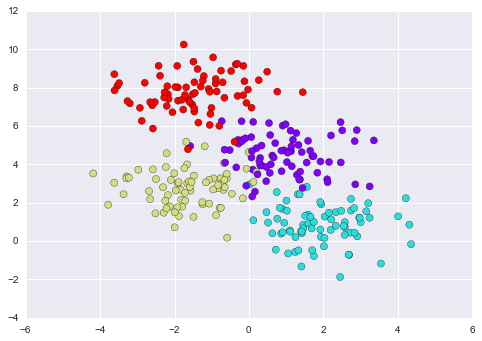
![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.08-decision-tree-levels.png?raw=1)


It's very easy to train the model and see the results as a tree. The difficult part is to choose the correct hyperparameters. The main problem with decission trees is that if the depth is high, we can easily run into overfitting. See for example the fourth picture above, we see that at depth 4, the models starts to make even more little partitions that doesn't really make sense. 

The DecissionTreeClassifiers uses different metrics to decide which feature to use for the partition, how to divide the tree, how to measure the quality of a split, how deep should the tree go... The quality of the split can be measured using different criteria:
- Entropy: is a basic measure of impurity (or disorder) in a given group. The higher this value, the more heterogeneous the group is.
- Gini: is the propability of labeling incorrectly any element picked at random. 
  - For example,for two classes, if this value is 0.5, it means that the elements are labeled randomly with no proper thinking.
  - A value of one indicates that all elements are labeled incorrectly.

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9090909090909091

With the graphviz module, we can plot a graph showing the decission path of the tree. For example, the first partition is made based on the feature concave points_worst. 

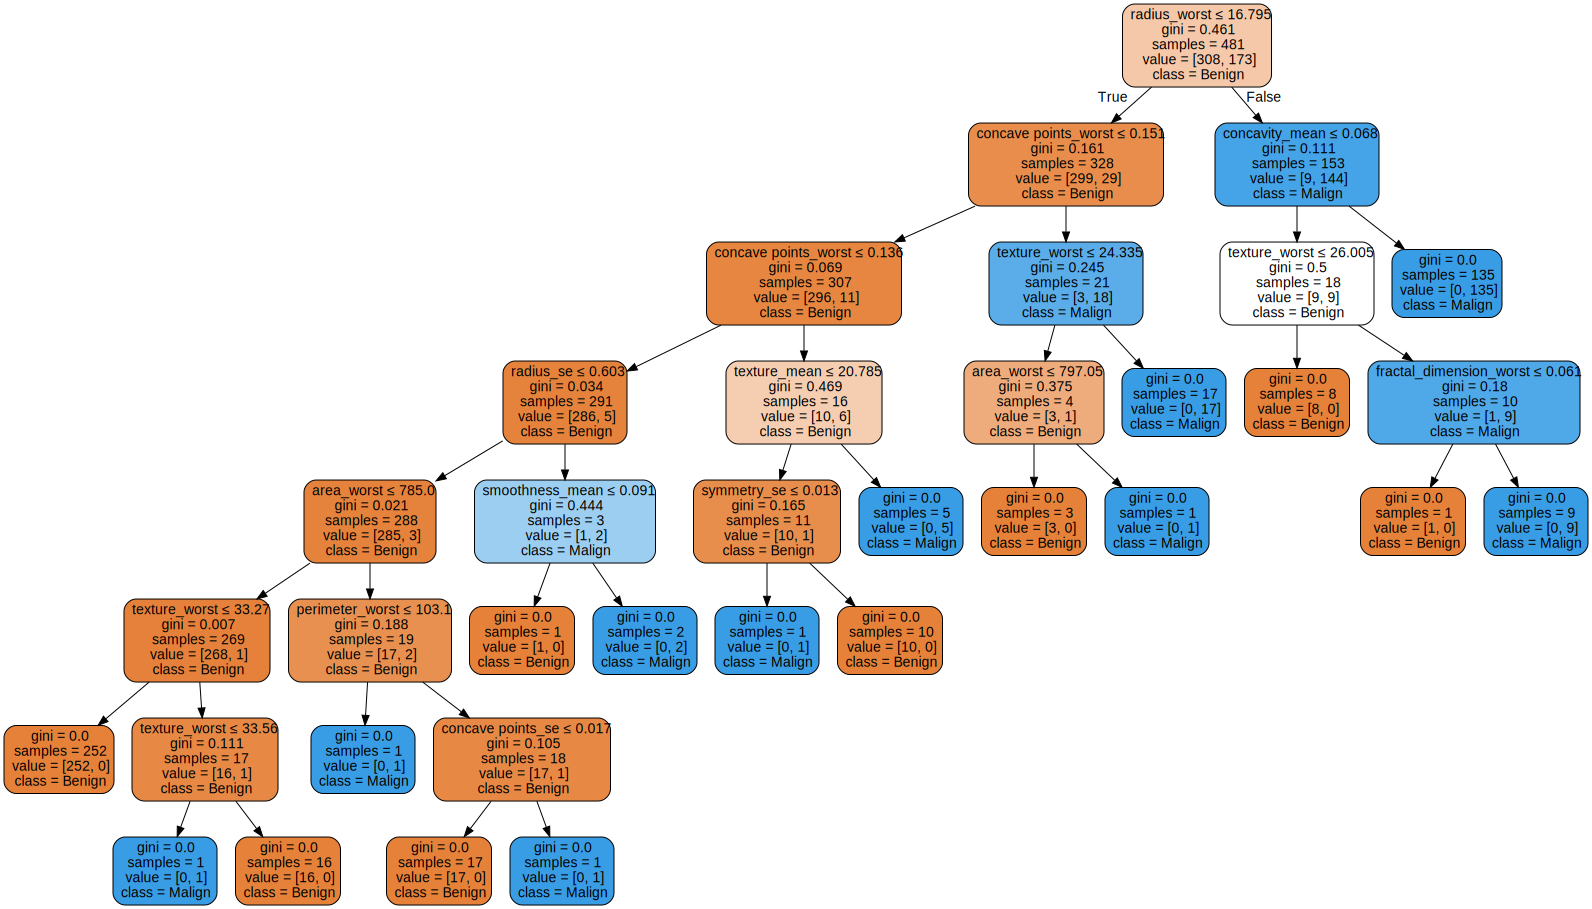

In [18]:
import graphviz 

dot_data = export_graphviz(model, out_file=None, 
                     feature_names=data.columns,
                     class_names=['Benign', 'Malign'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render('DecissionTree.pdf')
graph 

In [19]:
print(f'Depth of the tree: {model.get_depth()},\nNumber of leaves:{model.get_n_leaves()}')

Depth of the tree: 7,
Number of leaves:18


Analyzing the tree above, we see that we start with a gini index near 0.5, meaning that there's no proper classification. A benign value could be classified as benign or malign almost indistinctly. As we go deeper in the tree, we expect the gini index to decrease, until we see it with a value of 0 at the leaves, that should be homogeneus. At the end we have 6 layers of depth and 18 leaves. For only two classes, that may be too much, it's very likely that we have an overfitted algorythm here. 

The easiest way to deal with overfitting is to limit the depth, but maybe we lose precision. The other technique is called pruning, which stops the spliting when some values are found. Those values can be the gini index of the leave, or the minimum number of samples in a leave to consider that we have to split it, for example. 

Let's see if we can improve the performance by selecting some of these metrics in a gridsearch.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'], 
          'max_depth': range(2,7),
          'min_impurity_decrease': np.arange(0,.8,.1)}
grid = GridSearchCV(DecisionTreeClassifier(),
                    params, 
                    cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 7),
                         'min_impurity_decrease': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])})

In [21]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
grid.best_score_

0.9418599656357388

In [23]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.0}

### Random forests
Even if we run a GridSearch algorithm, it's very probable that the decission tree makes more partitions than necessary, resulting in overfitting. A solution for this problem is to run various decission trees and use the mean of the output in order to minimize the overfitting. We can imagine it as overlaying the partitions made by many trees, which would "blur" the limits and make more generalists areas. 

![](https://3.bp.blogspot.com/-gYBcwaQwfik/Ww0CsPZAsdI/AAAAAAAABok/I8uSk7bATIoVfJDY_E4aqCx-TKsBj0-ngCLcBGAs/s1600/random-forests.png)

This is basically how a Random Forest Algorithm works. This algorithm will run the data through various decission trees, each with a different root node, and then take the average of the prediction of all the trees to make the final decission. But if all tress would be fed with the same data, the outputs would be very similar. But, how do we do that if we have limited amount of data? The solution is a technique called _bagging_ (for bootstrap aggregation). 

For each decission tree, a sample of the original data is chosen. This sample can contain zero to many copies of each element in the dataset, but the total number of values is always the same. Another difference is that every decission tree will decide over different features of the data set. We can tweak different things on the class constructor.

|Original data|Sample 1|Sample 2|Sample 3|
|:---:|:---:|:---:|:---:|
|A|E|B|C|
|B|A|D|D|
|C|E|B|E|
|D|C|A|D|
|E|B|B|A|

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9545454545454546

In [25]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
px.imshow(cm, 
          title='Logistic regression model confusion matrix',
          labels=dict(x='Predicted', y='Truth', color='Number'),
          x=['Benign','Malign'],
          y=['Benign','Malign'])

We see that, without tweaking much the hyperparameters, we get already a good confusion matriz and a good score.